In [2]:
import os, sys
import datetime
import matplotlib
matplotlib.rc('text', usetex=True)

import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=2.5)

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

sys.path.append('../../')
sys.path.append('../')
from nexai.datasets.geostationary.goesr import GOESL1b, L1bBand, GroupBandTemporal
from nexai import interpolate
from metpy.plots import colortables

from nexai.utils import plotting


In [3]:
bands = [13,]
year = 2017
month = 3
day = 6
hour = 23
dayofyear = datetime.datetime(year, month, day).timetuple().tm_yday
spatial = 'RadM1'
product = 'ABI-L1b-RadM'
T = 10
checkpoint = '/nobackupp10/tvandal/nex-ai-opticalflow/geo/.tmp/models/V2/interp-ind/Channel-13/best.flownet.pth.tar'

In [4]:
geo = GOESL1b(channels=bands, product=product)
files = geo.local_files(year, dayofyear, hour=hour)
files = files.xs(spatial, level='spatial')

l1b = L1bBand(files.values[0,0])
l1b.open_dataset()

l1b_10 = L1bBand(files.values[T,0])
l1b_10.open_dataset()


/nobackupp10/tvandal/miniconda3/envs/geonex/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


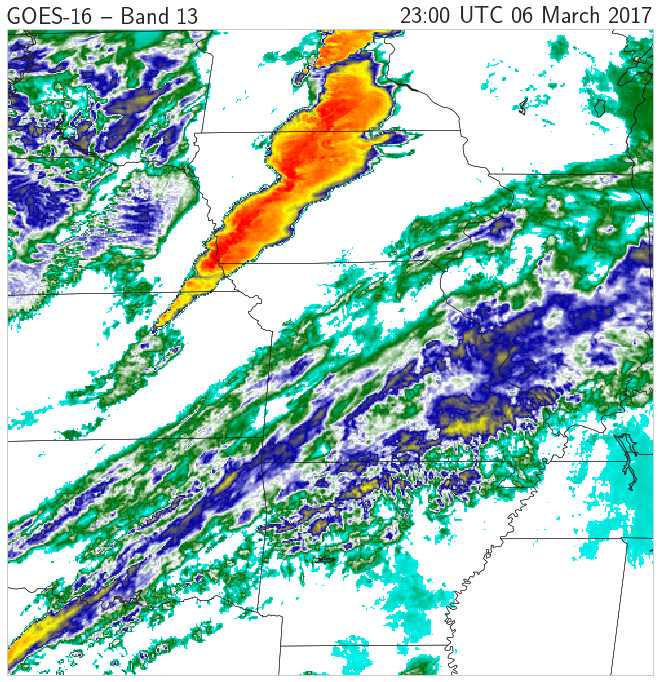

In [7]:
X1 = l1b.data['Rad'].values

#plt.hist(X1, bins=100)
#plt.show()

# Satellite height
sat_h = l1b.data['goes_imager_projection'].perspective_point_height
# Satellite longitude
sat_lon = l1b.data['goes_imager_projection'].longitude_of_projection_origin
x = l1b.data['x'].values * sat_h
y = l1b.data['y'].values * sat_h

#ax = plotting.plot_infrared(X1, x, y, sat_lon)
ax = l1b.plot_infrared()
#ax.set_title(f'Mesoscale', fontweight='semibold', loc='left', fontsize=14)
#ax.set_title('%s' % l1b.datetime.strftime('%H:%M UTC %d %B %Y'), loc='right', fontsize=14)
plt.tight_layout()
plt.savefig("figures/mesoscale-infrared-13-10.43.pdf", dpi=300, frameon=False)

In [8]:
geo_f = GOESL1b(channels=bands, product='ABI-L1b-RadF')
files = geo_f.local_files(year, dayofyear, hour=hour)
files = files.xs('RadF', level='spatial')

fulldisk = L1bBand(files.values[0,0])
fulldisk.open_dataset()

/nobackupp10/tvandal/miniconda3/envs/geonex/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))


/nobackupp10/tvandal/miniconda3/envs/geonex/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


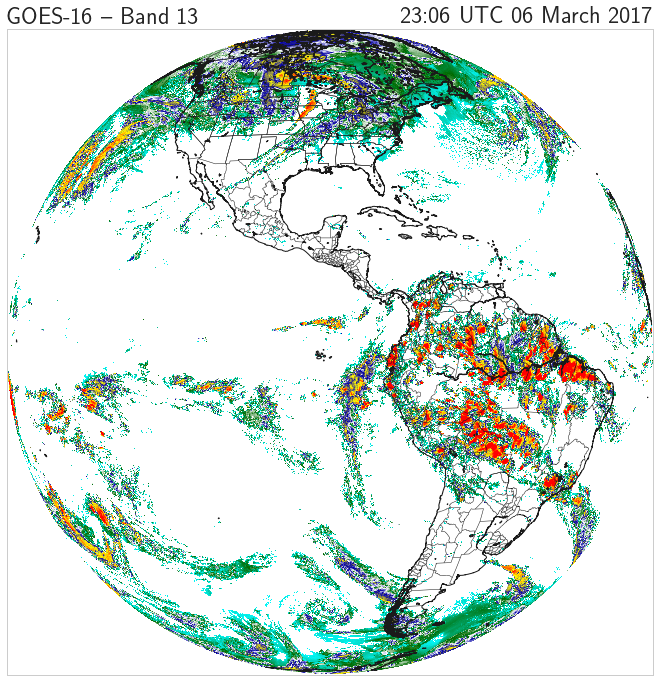

In [9]:
X1 = fulldisk.data['Rad'].values

#plt.hist(X1, bins=100)
#plt.show()

# Satellite height
sat_h = fulldisk.data['goes_imager_projection'].perspective_point_height
# Satellite longitude
sat_lon = fulldisk.data['goes_imager_projection'].longitude_of_projection_origin
x = fulldisk.data['x'].values * sat_h
y = fulldisk.data['y'].values * sat_h

#ax = plotting.plot_infrared(X1, x, y, sat_lon)
ax = fulldisk.plot_infrared()
#ax.set_title(f'Full Disk', fontweight='semibold', loc='left', fontsize=15)
#ax.set_title('%s' % fulldisk.datetime.strftime('%H:%M UTC %d %B %Y'), loc='right', fontsize=15)
plt.tight_layout()
plt.savefig("figures/fulldisk-infrared-13-10.43.pdf", dpi=300, frameon=False)